In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression , SGDRegressor # LinearRegression : 공식 , SGDRegressor 학습
from sklearn.neural_network import MLPRegressor # (딥러닝)학습
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

from sklearn.metrics import r2_score # 선형회귀 결정계수

from sklearn.datasets import load_boston, load_iris, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import make_pipeline

from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF

1. trees.csv를 읽어들여서 아래에 대해
 
 1) 상관관계, 다중공선성을 확인하시요
 
 2) crossvalidation score 를 구하시요.
 
 3) 아래의 데이터를 이용하여 Volume을 예측하시요
 
Girth 8.8, 10.5
Height 63, 72

2. volume이 40 이상이면 크다
30이상이면 보통 미만이면 적음으로
아래와 같이 출력하시요

volume  정도

===============

 10.3    적음
...

3. Height  가 가장 작은값과 큰값을
구하시요

4. girth(테두리) 가 가장큰 top5를
구하시요(girth, height, volume)

In [3]:
trees = pd.read_csv('data/trees.csv')
trees

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7
6,11.0,66,15.6
7,11.0,75,18.2
8,11.1,80,22.6
9,11.2,75,19.9


### 1번 

In [4]:
x_data = trees.drop('Volume',axis=1)
y_data = trees['Volume']

x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.2,random_state=1)

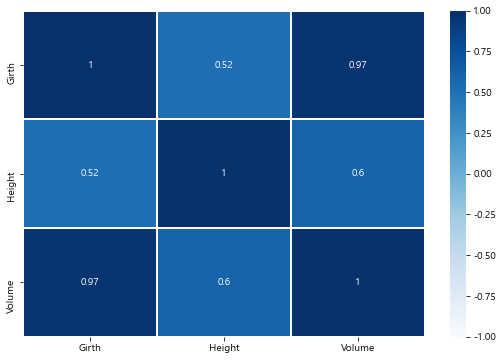

,VIF Factor,feature
0,25.633257,Girth
1,25.633257,Height


,VIF Factor,feature
0,158.198657,Girth
1,62.939266,Height
2,32.993875,Volume


In [5]:
# 상관관계 
plt.figure(figsize=(9,6))
sns.heatmap(trees.corr(),annot=True,linewidth=0.2,cmap='Blues',
           vmin=-1,vmax=1)
plt.show()

# VIF
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x_data.values,i) for i in range(x_data.shape[1])]
vif['feature'] = x_data.columns
display(vif)

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(trees.values,i) for i in range(trees.shape[1])]
vif['feature'] = trees.columns
display(vif)

In [6]:
# LinearRegression
model_tree = make_pipeline(StandardScaler(),LinearRegression())
model_tree.fit(x_train,y_train)

print('train : ',model_tree.score(x_train,y_train))
print('test : ',model_tree.score(x_test,y_test))

r2_scores = cross_val_score(model_tree,x_data,y_data,
                            scoring='r2',cv=5,verbose=1)
print('r2 scores : ',r2_scores)
print('mean : ',r2_scores.mean())

print('predict : ',model_tree.predict([[8.8,63],[10.5,72]]))

train :  0.9501000553451436
test :  0.9161318541491204
r2 scores :  [-2.42679092  0.59361755 -0.14097307  0.45908741 -0.6044407 ]
mean :  -0.42389994809043596
predict :  [ 5.84983575 16.27579072]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [7]:
# SGDRegressor

model_tree = make_pipeline(StandardScaler(),SGDRegressor())
model_tree.fit(x_train,y_train)

print('train : ',model_tree.score(x_train,y_train))
print('test : ',model_tree.score(x_test,y_test))

r2_scores = cross_val_score(model_tree,x_data,y_data,
                            scoring='r2',cv=5,verbose=1)
print('r2 scores : ',r2_scores)
print('mean : ',r2_scores.mean())

print('predict : ',model_tree.predict([[8.8,63],[10.5,72]]))

train :  0.9499151720351219
test :  0.9222874571726627
r2 scores :  [-2.51005622  0.67006365 -0.16281769  0.53841776 -0.67182847]
mean :  -0.4272441950539432
predict :  [ 5.62937094 16.28168792]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


In [9]:
# 2번 문제

trees['정도'] = 0
x1 = trees.query('Volume >= 40').index
x2 = trees.query('Volume >= 30 and Volume < 40').index
x3 = trees.query('Volume < 30').index

trees.loc[x1,'정도'] = '크다'
trees.loc[x2,'정도'] = '보통'
trees.loc[x3,'정도'] = '작음'

trees

,Girth,Height,Volume,정도
0,8.3,70,10.3,작음
1,8.6,65,10.3,작음
2,8.8,63,10.2,작음
3,10.5,72,16.4,작음
4,10.7,81,18.8,작음
5,10.8,83,19.7,작음
6,11.0,66,15.6,작음
7,11.0,75,18.2,작음
8,11.1,80,22.6,작음
9,11.2,75,19.9,작음


In [11]:
# 3번 문제 

tree_height = trees['Height']
print(tree_height.min())
print(tree_height.max())


63
87


In [12]:
# 4번 문제
trees.sort_values('Girth',ascending=False, inplace=True)
top5_Girth = trees.head(5)
top5_Girth

,Girth,Height,Volume,정도
30,20.6,87,77.0,크다
29,18.0,80,51.0,크다
28,18.0,80,51.5,크다
27,17.9,80,58.3,크다
26,17.5,82,55.7,크다
